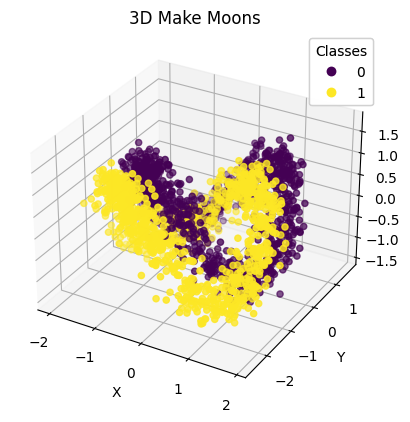

In [10]:
# Generating 3D make-moons data

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def make_moons_3d(n_samples=500, noise=0.1):
    # Generate the original 2D make_moons data
    t = np.linspace(0, 2 * np.pi, n_samples)
    x = 1.5 * np.cos(t)
    y = np.sin(t)
    z = np.sin(2 * t)  # Adding a sinusoidal variation in the third dimension

    # Concatenating the positive and negative moons with an offset and noise
    X = np.vstack([np.column_stack([x, y, z]), np.column_stack([-x, y - 1, -z])])
    y = np.hstack([np.zeros(n_samples), np.ones(n_samples)])

    # Adding Gaussian noise
    X += np.random.normal(scale=noise, size=X.shape)

    return X, y

# Generate the data (1000 datapoints)
X, labels = make_moons_3d(n_samples=1000, noise=0.2)
X_test, labels_test = make_moons_3d(n_samples=250, noise=0.2)
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', marker='o')
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Make Moons')
plt.show()

In [16]:
# Method1: Using a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, labels)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(labels_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.956


In [32]:
# Method2: AdaBoost + DecisionTrees
from sklearn.ensemble import AdaBoostClassifier
base_tree = DecisionTreeClassifier(max_depth=5)
ada_clf = AdaBoostClassifier(estimator=base_tree, n_estimators=100, random_state=42)
ada_clf.fit(X, labels)
y_pred = ada_clf.predict(X_test)
accuracy = accuracy_score(labels_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.98


In [39]:
# Method3: SVM
from sklearn.svm import SVC
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    print(f"\nTraining SVM with kernel: {kernel}")
    svm_clf = SVC(kernel=kernel, C=1.0, gamma=1)
    svm_clf.fit(X, labels)

    y_pred = svm_clf.predict(X_test)
    accuracy = accuracy_score(labels_test, y_pred)
    print(f"SVM Accuracy on Test Set (kernel={kernel}): {accuracy:.3f}")


Training SVM with kernel: linear
SVM Accuracy on Test Set (kernel=linear): 0.674

Training SVM with kernel: rbf
SVM Accuracy on Test Set (kernel=rbf): 0.986

Training SVM with kernel: poly
SVM Accuracy on Test Set (kernel=poly): 0.872
